In [12]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
#Load Dataset
dataset = pd.read_csv('./EnergyUse-Cooling.csv')
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [14]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,48.030000


In [18]:
#Remove Model Column
dataset2=dataset.drop('Y',axis=1)
dataset2.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


<AxesSubplot:>

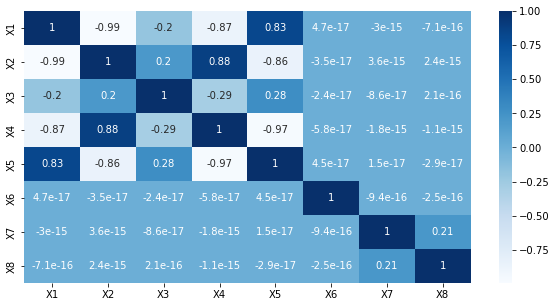

In [27]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset2.corr(),annot=True,cmap="Blues")

In [32]:
#Create x and y variables
x = dataset.drop('Y', axis=1).to_numpy()
Y = dataset['Y'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.2,random_state = 100) 

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Model
from sklearn.neighbors import KNeighborsRegressor

In [33]:


#Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=Y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_root_mean_squared_error',
                                                            cv=10, random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([0,8])
    plt.show()
   

k-NN Regressor Learning Curve


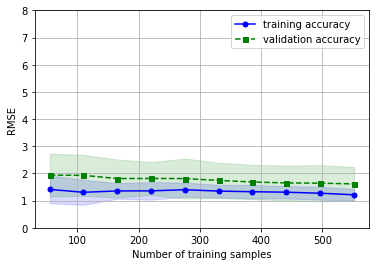

In [36]:
#Plot Learning Curve
print('k-NN Regressor Learning Curve')
plot_learning_curves(KNeighborsRegressor(2))

In [30]:
#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score
from sklearn import metrics  

k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn_org = KNeighborsRegressor(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn_org, x_train2, Y_train, cv=10, scoring='neg_root_mean_squared_error')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
#Print Best Score
BestScore = [1 - x for x in k_scores]
best_k = k_range[BestScore.index(min(BestScore))]

#Create Orginal KNN model
classifier_org = KNeighborsRegressor(n_neighbors = best_k)

#Fit KNN Model
classifier_org.fit(x_train2, Y_train)

#Prediction
y_pred_org = classifier_org.predict(x_test2)

print('Original Model')
print('\nn_neighbors:',str(best_k))
print('\nR2: {:.2f}'.format(metrics.r2_score(Y_test, y_pred_org)))
adjusted_r_squared = 1-(1-metrics.r2_score(Y_test,y_pred_org))*(len(Y)-1)/(len(Y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred_org)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(Y_test, y_pred_org)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred_org))))  

Original Model

n_neighbors: 2

R2: 0.90
Adj_R2: 0.90
Mean Absolute Error: 1.88
Mean Squared Error: 8.33
Root Mean Squared Error: 2.89


In [31]:
#Gridsearch

from sklearn.model_selection import GridSearchCV

#k-NN Regression Model
knnreg2 = KNeighborsRegressor()
k_range = range(1, 10)
param_grid = { 
           'n_neighbors': k_range,
           'algorithm' : ['auto','ball_tree','kd_tree','brute'],
           'weights' : ['uniform','distance']}

knn_model = GridSearchCV(knnreg2, param_grid, cv=10, verbose=0,
                         scoring='neg_root_mean_squared_error')

grids = [knn_model] 
grid_dict = {0:'k-NN Regression Model'}

#Model Creation

#Create Heading
print('Optimized Model') 

#Fit the grid search objects 
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: {}'.format(grid_dict[idx])) 
     #Fit grid search
     optmodel.fit(x_train2, Y_train) 
     #Best params 
     print('\nBest params: {}'.format(optmodel.best_params_)) 
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(x_test2) 
     # Test data accuracy of model with best params    
     print('\nR2: {:.2f}'.format(metrics.r2_score(Y_test, y_pred3)))
     adjusted_r_squared = 1-(1-metrics.r2_score(Y_test,y_pred3))*(len(Y)-1)/(len(Y)-x.shape[1]-1)
     print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))  
     #Print MSE and RMSE
     print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred3)))
     print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(Y_test, y_pred3)))
     print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred3))))  

Optimized Model

Estimator: k-NN Regression Model

Best params: {'algorithm': 'brute', 'n_neighbors': 4, 'weights': 'distance'}

R2: 0.91
Adj_R2: 0.90
Mean Absolute Error: 1.84
Mean Squared Error: 7.92
Root Mean Squared Error: 2.81
